In [2]:
pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 683.7 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42567 sha256=be37e3061e4326b2e6515aa81e5af317c9afec4ac7cc31ff392e0abddb08074b
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


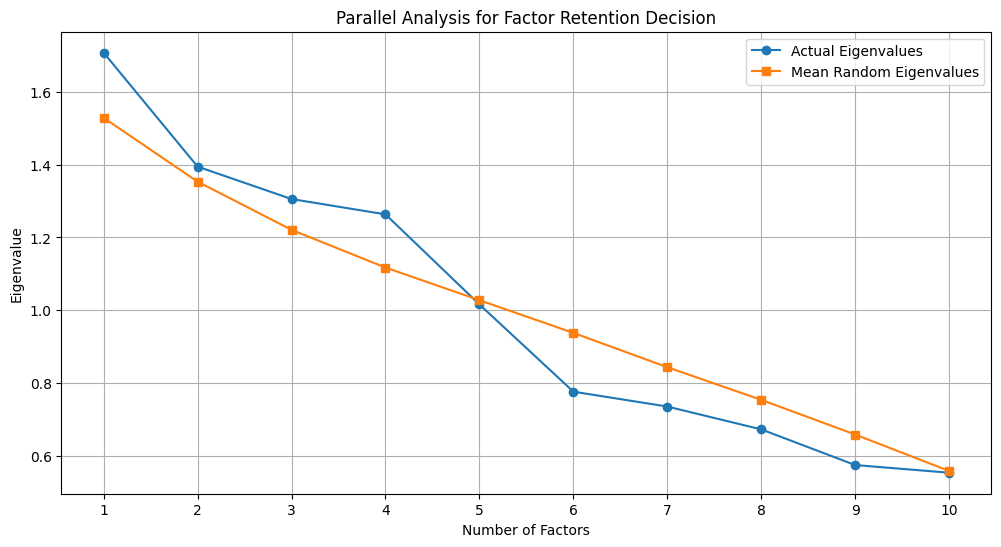

Number of factors to retain based on parallel analysis: 4


In [3]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a sample dataset with 10 variables
np.random.seed(42)
data = pd.DataFrame({
    'Variable1': np.random.normal(0, 1.5, 100),
    'Variable2': np.random.normal(0, 2, 100),
    'Variable3': np.random.normal(0, 1.2, 100),
    'Variable4': np.random.normal(0, 1.8, 100),
    'Variable5': np.random.normal(0, 1.5, 100),
    'Variable6': np.random.normal(0, 2.2, 100),
    'Variable7': np.random.normal(0, 1.7, 100),
    'Variable8': np.random.normal(0, 1.3, 100),
    'Variable9': np.random.normal(0, 1, 100),
    'Variable10': np.random.normal(0, 2.1, 100)
})

# Standardize data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Step 2: Initialize factor analysis object and fit the model
fa = FactorAnalyzer(n_factors=data.shape[1], rotation=None, method='principal')
fa.fit(data)

# Step 3: Get eigenvalues from the factor analysis
ev, _ = fa.get_eigenvalues()

# Step 4: Perform parallel analysis manually
random_eigenvalues = []
n_iter = 100
for _ in range(n_iter):
    # Generate random data
    random_data = np.random.normal(size=data.shape)
    random_fa = FactorAnalyzer(n_factors=data.shape[1], rotation=None, method='principal')
    random_fa.fit(random_data)
    random_ev, _ = random_fa.get_eigenvalues()
    random_eigenvalues.append(random_ev)

# Compute the mean eigenvalues across all simulations
mean_random_eigenvalues = np.mean(random_eigenvalues, axis=0)

# Step 5: Plot the results from parallel analysis
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(ev) + 1), ev, 'o-', label='Actual Eigenvalues')
plt.plot(range(1, len(mean_random_eigenvalues) + 1), mean_random_eigenvalues, 's-', label='Mean Random Eigenvalues')
plt.title('Parallel Analysis for Factor Retention Decision')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, 11))  # Ensure x-axis shows 1, 2, ..., 10
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Interpret the result
factors_to_retain = np.sum(ev > mean_random_eigenvalues)
print(f"Number of factors to retain based on parallel analysis: {factors_to_retain}")
